In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
from scipy.stats import mannwhitneyu, ttest_ind

/Users/vishalsharma/Desktop/Data Science Projects/Student_Response_Analysis/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load data
data_2021 = pd.read_csv('../data/student_responses_2021.csv')
data_2022 = pd.read_csv('../data/student_responses_2022.csv')

In [22]:
import dtale

d1 = dtale.show(data_2021, name="DataFrame 1",enable_custom_filters=True)
d1.open_browser()

d2 = dtale.show(data_2022, name="DataFrame 2",enable_custom_filters=True)
d2.open_browser()

2024-11-07 21:57:28,998 - WARNING  - Custom filtering enabled. Custom filters are vulnerable to code injection attacks, please only use in trusted environments.
2024-11-07 21:57:29,221 - WARNING  - Custom filtering enabled. Custom filters are vulnerable to code injection attacks, please only use in trusted environments.


Address already in use
Port 40000 is in use by another program. Either identify and stop that program, or start the server with a different port.
2024-11-07 21:57:30,152 - ERROR    - 1
Traceback (most recent call last):
  File "/Users/vishalsharma/Desktop/Data Science Projects/Student_Response_Analysis/.venv/lib/python3.9/site-packages/werkzeug/serving.py", line 759, in __init__
    self.server_bind()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/http/server.py", line 138, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/socketserver.py", line 466, in server_bind
    self.socket.bind(self.server_address)
OSError: [Errno 48] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/vishalsharma/Desktop/Data Science Projects/S

In [ ]:
# View  active D-Tale sessions
dtale_instance = dtale.get_instance('DataFrame 2')
print(dtale_instance)



In [ ]:
# If necessary, close a session by its name or instance ID
dtale_instance.kill() 

In [6]:
data_2021.describe(),data_2022.describe()

(         student_id   question_id       ability    difficulty
 count  45000.000000  45000.000000  44100.000000  44100.000000
 mean     500.500000     23.000000     -0.041824     -0.057131
 std      288.678198     12.987317      2.167235      1.053968
 min        1.000000      1.000000     -5.751698     -2.157522
 25%      250.750000     12.000000     -1.507034     -0.870725
 50%      500.500000     23.000000     -0.068255     -0.147794
 75%      750.250000     34.000000      1.442855      0.904278
 max     1000.000000     45.000000      5.889554      1.774446,
          student_id   question_id       ability    difficulty
 count  50000.000000  50000.000000  49000.000000  49000.000000
 mean    1500.500000     25.500000      0.330433      0.116709
 std      288.677877     14.431014      2.448007      1.171172
 min     1001.000000      1.000000     -5.653869     -1.955096
 25%     1250.750000     13.000000     -1.047968     -0.728539
 50%     1500.500000     25.500000      0.101803     -

In [4]:
# Data Exploration (Before Cleaning)
# Initial inspection of data
print("First few rows of 2021 data:")
print(data_2021.head())
print("\nFirst few rows of 2022 data:")
print(data_2022.head())

# Check data types for both datasets
print("\nData types for 2021 data:")
print(data_2021.dtypes)
print("\nData types for 2022 data:")
print(data_2022.dtypes)

# Summary statistics for both years
print("\nSummary statistics for 2021 data:")
print(data_2021.describe())
print("\nSummary statistics for 2022 data:")
print(data_2022.describe())

# Check for missing values
print("\nMissing values in 2021 data:")
print(data_2021.isna().sum())
print("\nMissing values in 2022 data:")
print(data_2022.isna().sum())

First few rows of 2021 data:
   student_id  question_id   ability  difficulty  answered_correctly
0         967           40 -0.320326    1.572793               False
1         135            2 -2.897524   -1.920777               False
2         553           18 -1.207800   -0.482901               False
3         564           29 -2.012802    0.360224               False
4         449           42  0.332158    1.211066               False

First few rows of 2022 data:
   student_id  question_id   ability  difficulty  answered_correctly
0        1078           22  1.023237   -0.280792                True
1        1980           37 -2.243018    1.430540               False
2        1240           14  3.453396   -0.872714                True
3        1329           33  1.750230    0.816172                True
4        1995           17  2.288340   -0.558914                True

Data types for 2021 data:
student_id              int64
question_id             int64
ability               floa

In [5]:
# Correlation analysis (Before Cleaning)
print("\nCorrelation matrix for 2021 data (Before Cleaning):")
print(data_2021.corr())

print("\nCorrelation matrix for 2022 data (Before Cleaning):")
print(data_2022.corr())


Correlation matrix for 2021 data (Before Cleaning):
                      student_id   question_id   ability  difficulty  \
student_id          1.000000e+00 -4.091178e-17  0.008400   -0.001028   
question_id        -4.091178e-17  1.000000e+00  0.000216    0.970160   
ability             8.400042e-03  2.161391e-04  1.000000   -0.000727   
difficulty         -1.028017e-03  9.701603e-01 -0.000727    1.000000   
answered_correctly  1.387375e-02 -3.480023e-01  0.719324   -0.357932   

                    answered_correctly  
student_id                    0.013874  
question_id                  -0.348002  
ability                       0.719324  
difficulty                   -0.357932  
answered_correctly            1.000000  

Correlation matrix for 2022 data (Before Cleaning):
                      student_id   question_id   ability  difficulty  \
student_id          1.000000e+00  6.782625e-17 -0.009090    0.000837   
question_id         6.782625e-17  1.000000e+00  0.000054    0.978494   

In [6]:
# Data Cleaning
# Drop rows with missing values in 'ability' and 'difficulty' if they can not be imputed 
# Check if each student has the same ability in both datasets
consistent_ability_2021 = data_2021.groupby('student_id')['ability'].nunique() == 1
consistent_ability_2022 = data_2022.groupby('student_id')['ability'].nunique() == 1
consistent_ability_students_2021 = consistent_ability_2021[consistent_ability_2021].index
consistent_ability_students_2022 = consistent_ability_2022[consistent_ability_2022].index

In [7]:
ability_data_2021 = data_2021[data_2021['ability'].isna()]


In [8]:
ability_data_2021['student_id'].value_counts()

student_id
277    5
428    4
772    4
917    4
622    4
      ..
609    1
987    1
79     1
483    1
907    1
Name: count, Length: 612, dtype: int64

In [9]:
# Create a Map and replace 
# Create a dictionary of student to ability if ability is consistent
student_ability_dict_2021 = data_2021.loc[data_2021['student_id'].isin(consistent_ability_students_2021)].groupby('student_id')['ability'].first().to_dict()
student_ability_dict_2022 = data_2022.loc[data_2022['student_id'].isin(consistent_ability_students_2022)].groupby('student_id')['ability'].first().to_dict()

# Impute missing values for ability using the dictionary for students with consistent ability
data_2021['ability'] = data_2021.apply(lambda row: student_ability_dict_2021[row['student_id']] if pd.isna(row['ability']) and row['student_id'] in student_ability_dict_2021 else row['ability'], axis=1)
data_2022['ability'] = data_2022.apply(lambda row: student_ability_dict_2022[row['student_id']] if pd.isna(row['ability']) and row['student_id'] in student_ability_dict_2022 else row['ability'], axis=1)


In [10]:
new_ability_data_2021 = data_2021[data_2021['ability'].isna()]
print(len(new_ability_data_2021))

0


In [11]:
# Check if each question has the same difficulty in both datasets
consistent_difficulty_2021 = data_2021.groupby('question_id')['difficulty'].nunique() == 1
consistent_difficulty_2022 = data_2022.groupby('question_id')['difficulty'].nunique() == 1
consistent_difficulty_questions_2021 = consistent_difficulty_2021[consistent_difficulty_2021].index
consistent_difficulty_questions_2022 = consistent_difficulty_2022[consistent_difficulty_2022].index

print(f"\nNumber of questions with consistent difficulty in 2021: {len(consistent_difficulty_questions_2021)}")
print(f"Number of questions with consistent difficulty in 2022: {len(consistent_difficulty_questions_2022)}")



Number of questions with consistent difficulty in 2021: 45
Number of questions with consistent difficulty in 2022: 50


In [12]:
# Create a dictionary of question to difficulty if difficulty is consistent
question_difficulty_dict_2021 = data_2021.loc[data_2021['question_id'].isin(consistent_difficulty_questions_2021)].groupby('question_id')['difficulty'].first().to_dict()
question_difficulty_dict_2022 = data_2022.loc[data_2022['question_id'].isin(consistent_difficulty_questions_2022)].groupby('question_id')['difficulty'].first().to_dict()


In [13]:
# Impute missing values for difficulty using the dictionary for questions with consistent difficulty
data_2021['difficulty'] = data_2021.apply(lambda row: question_difficulty_dict_2021[row['question_id']] if pd.isna(row['difficulty']) and row['question_id'] in question_difficulty_dict_2021 else row['difficulty'], axis=1)
data_2022['difficulty'] = data_2022.apply(lambda row: question_difficulty_dict_2022[row['question_id']] if pd.isna(row['difficulty']) and row['question_id'] in question_difficulty_dict_2022 else row['difficulty'], axis=1)


In [14]:
# Re-check for missing values after imputation
print("\nMissing values in 2021 data after imputation:")
print(data_2021.isna().sum())
print("\nMissing values in 2022 data after imputation:")
print(data_2022.isna().sum())



Missing values in 2021 data after imputation:
student_id            0
question_id           0
ability               0
difficulty            0
answered_correctly    0
dtype: int64

Missing values in 2022 data after imputation:
student_id            0
question_id           0
ability               0
difficulty            0
answered_correctly    0
dtype: int64


In [15]:
# Drop rows with missing values in 'ability' and 'difficulty' if they can not be imputed 
data_2021_clean = data_2021.dropna(subset=['ability', 'difficulty'])
data_2022_clean = data_2022.dropna(subset=['ability', 'difficulty'])

print("\nMissing values after cleaning in 2021 data:")
print(data_2021_clean.isna().sum())
print("\nMissing values after cleaning in 2022 data:")
print(data_2022_clean.isna().sum())

# Check for duplicate rows
duplicates_2021 = data_2021_clean.duplicated().sum()
duplicates_2022 = data_2022_clean.duplicated().sum()
print(f"\nNumber of duplicate rows in 2021 data: {duplicates_2021}")
print(f"Number of duplicate rows in 2022 data: {duplicates_2022}")



Missing values after cleaning in 2021 data:
student_id            0
question_id           0
ability               0
difficulty            0
answered_correctly    0
dtype: int64

Missing values after cleaning in 2022 data:
student_id            0
question_id           0
ability               0
difficulty            0
answered_correctly    0
dtype: int64

Number of duplicate rows in 2021 data: 0
Number of duplicate rows in 2022 data: 0


In [16]:
# Correlation analysis (After Cleaning)
print("\nCorrelation matrix for 2021 data (After Cleaning):")
print(data_2021_clean.corr())

print("\nCorrelation matrix for 2022 data (After Cleaning):")
print(data_2022_clean.corr())


Correlation matrix for 2021 data (After Cleaning):
                      student_id   question_id       ability    difficulty  \
student_id          1.000000e+00 -4.091178e-17  8.987529e-03 -1.625031e-17   
question_id        -4.091178e-17  1.000000e+00  3.815950e-17  9.701860e-01   
ability             8.987529e-03  3.815950e-17  1.000000e+00  7.414708e-18   
difficulty         -1.625031e-17  9.701860e-01  7.414708e-18  1.000000e+00   
answered_correctly  1.387375e-02 -3.480023e-01  7.192538e-01 -3.572041e-01   

                    answered_correctly  
student_id                    0.013874  
question_id                  -0.348002  
ability                       0.719254  
difficulty                   -0.357204  
answered_correctly            1.000000  

Correlation matrix for 2022 data (After Cleaning):
                      student_id   question_id       ability    difficulty  \
student_id          1.000000e+00  6.782625e-17 -9.606692e-03  1.193926e-16   
question_id         6.782

In [17]:
# Feature Engineering
# Student-level Aggregations
student_features_2021 = data_2021_clean.groupby('student_id').agg(
    avg_ability=('ability', 'mean'),
    total_questions_answered=('question_id', 'count'),
    avg_correct_answers=('answered_correctly', 'mean')
).reset_index()

student_features_2022 = data_2022_clean.groupby('student_id').agg(
    avg_ability=('ability', 'mean'),
    total_questions_answered=('question_id', 'count'),
    avg_correct_answers=('answered_correctly', 'mean')
).reset_index()

print("\nStudent-level Aggregations for 2021:")
print(student_features_2021.head())
print("\nStudent-level Aggregations for 2022:")
print(student_features_2022.head())

# Question-level Aggregations
question_features_2021 = data_2021_clean.groupby('question_id').agg(
    avg_difficulty=('difficulty', 'mean'),
    freq_correct_answers=('answered_correctly', 'sum'),
    success_rate=('answered_correctly', 'mean')
).reset_index()

question_features_2022 = data_2022_clean.groupby('question_id').agg(
    avg_difficulty=('difficulty', 'mean'),
    freq_correct_answers=('answered_correctly', 'sum'),
    success_rate=('answered_correctly', 'mean')
).reset_index()

print("\nQuestion-level Aggregations for 2021:")
print(question_features_2021.head())
print("\nQuestion-level Aggregations for 2022:")
print(question_features_2022.head())



Student-level Aggregations for 2021:
   student_id  avg_ability  total_questions_answered  avg_correct_answers
0           1     1.613025                        45             0.977778
1           2    -0.262677                        45             0.466667
2           3     1.020733                        45             0.777778
3           4     1.784271                        45             1.000000
4           5     3.086568                        45             1.000000

Student-level Aggregations for 2022:
   student_id  avg_ability  total_questions_answered  avg_correct_answers
0        1001     1.457581                        50                 0.86
1        1002    -0.209370                        50                 0.50
2        1003     1.356391                        50                 0.82
3        1004     2.007052                        50                 0.94
4        1005     3.363516                        50                 1.00

Question-level Aggregations for 202

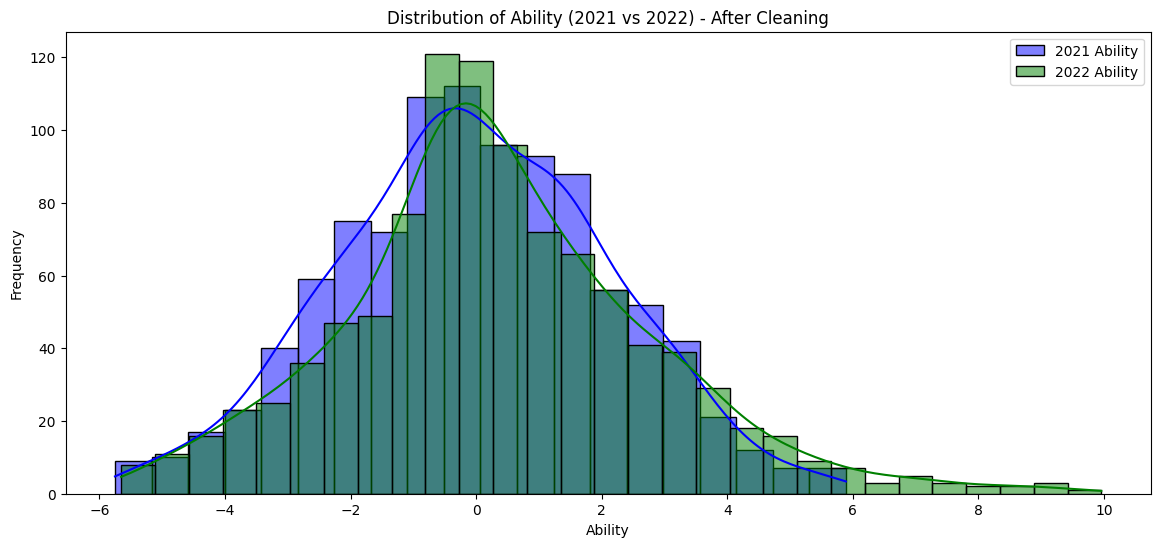

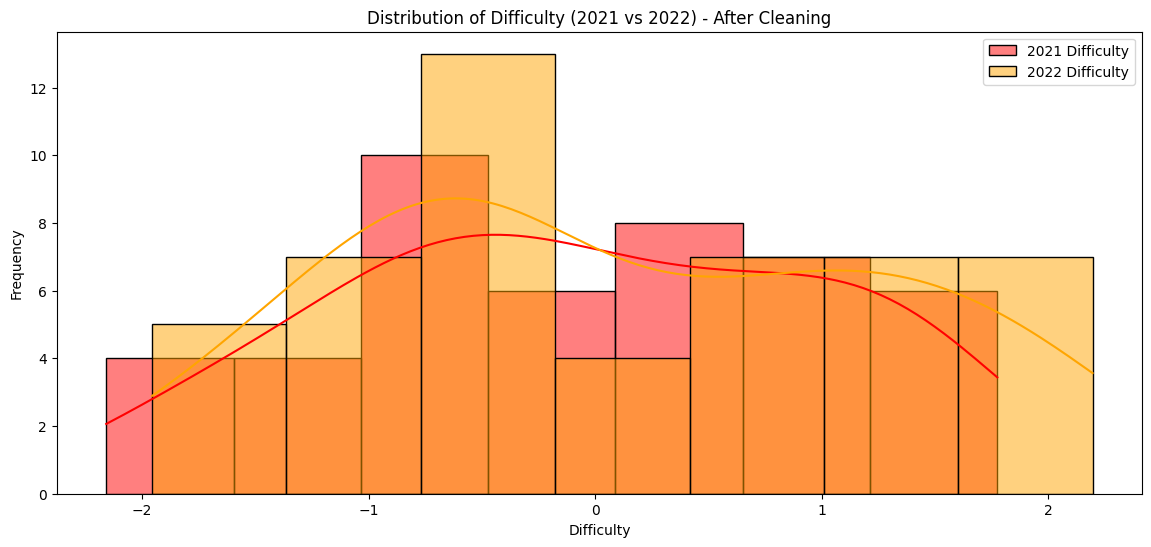

In [18]:
# Distribution analysis (After Cleaning)
# Visualize the distribution of ability and difficulty for both years after cleaning
plt.figure(figsize=(14, 6))
sns.histplot(student_features_2021['avg_ability'], color='blue', label='2021 Ability', kde=True, alpha=0.5)
sns.histplot(student_features_2022['avg_ability'], color='green', label='2022 Ability', kde=True, alpha=0.5)
plt.title('Distribution of Ability (2021 vs 2022) - After Cleaning')
plt.legend()
plt.xlabel('Ability')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(question_features_2021['avg_difficulty'], color='red', label='2021 Difficulty', kde=True, alpha=0.5)
sns.histplot(question_features_2022['avg_difficulty'], color='orange', label='2022 Difficulty', kde=True, alpha=0.5)
plt.title('Distribution of Difficulty (2021 vs 2022) - After Cleaning')
plt.legend()
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.show()

In [19]:
student_features_2021

,student_id,avg_ability,total_questions_answered,avg_correct_answers
0,1,1.613025,45,0.977778
1,2,-0.262677,45,0.466667
2,3,1.020733,45,0.777778
3,4,1.784271,45,1.000000
4,5,3.086568,45,1.000000
...,...,...,...,...
995,996,-2.727085,45,0.000000
996,997,-1.026189,45,0.177778
997,998,-2.102828,45,0.022222
998,999,-3.216818,45,0.000000


In [20]:
# Statistical Analysis
# Define ability thresholds for high, middle, and low ability using quartiles
ability_threshold_high_2021 = student_features_2021['avg_ability'].quantile(0.75)
ability_threshold_low_2021 = student_features_2021['avg_ability'].quantile(0.25)

ability_threshold_high_2022 = student_features_2022['avg_ability'].quantile(0.75)
ability_threshold_low_2022 = student_features_2022['avg_ability'].quantile(0.25)

In [21]:

# Create ability groups for each year
high_ability_students_2021 = student_features_2021[student_features_2021['avg_ability'] >= ability_threshold_high_2021]
middle_ability_students_2021 = student_features_2021[
    (student_features_2021['avg_ability'] > ability_threshold_low_2021) & 
    (student_features_2021['avg_ability'] < ability_threshold_high_2021)
]
low_ability_students_2021 = student_features_2021[student_features_2021['avg_ability'] <= ability_threshold_low_2021]

high_ability_students_2022 = student_features_2022[student_features_2022['avg_ability'] >= ability_threshold_high_2022]
middle_ability_students_2022 = student_features_2021[
    (student_features_2022['avg_ability'] > ability_threshold_low_2022) & 
    (student_features_2022['avg_ability'] < ability_threshold_high_2022)
]
low_ability_students_2022 = student_features_2022[student_features_2022['avg_ability'] <= ability_threshold_low_2022]


In [22]:
high_ability_students_2021

,student_id,avg_ability,total_questions_answered,avg_correct_answers
0,1,1.613025,45,0.977778
3,4,1.784271,45,1.000000
4,5,3.086568,45,1.000000
5,6,1.960802,45,1.000000
6,7,2.190667,45,1.000000
...,...,...,...,...
985,986,2.615353,45,1.000000
986,987,2.048230,45,1.000000
990,991,4.285323,45,1.000000
993,994,1.821833,45,1.000000


In [23]:
# Calculate average accuracy for each ability group for both years
avg_accuracy_high_2021 = high_ability_students_2021['avg_correct_answers'].mean()
avg_accuracy_middle_2021 = middle_ability_students_2021['avg_correct_answers'].mean()
avg_accuracy_low_2021 = low_ability_students_2021['avg_correct_answers'].mean()

avg_accuracy_high_2022 = high_ability_students_2022['avg_correct_answers'].mean()
avg_accuracy_middle_2022 = middle_ability_students_2022['avg_correct_answers'].mean()
avg_accuracy_low_2022 = low_ability_students_2022['avg_correct_answers'].mean()


In [24]:
# Prepare a summary of average accuracies for all ability groups
accuracy_summary = {
    "High-Ability (2021)": avg_accuracy_high_2021,
    "High-Ability (2022)": avg_accuracy_high_2022,
    "Middle-Ability (2021)": avg_accuracy_middle_2021,
    "Middle-Ability (2022)": avg_accuracy_middle_2022,
    "Low-Ability (2021)": avg_accuracy_low_2021,
    "Low-Ability (2022)": avg_accuracy_low_2022
}
print("\nAverage Accuracies for Ability Groups:")
print(accuracy_summary)



Average Accuracies for Ability Groups:
{'High-Ability (2021)': np.float64(0.9925333333333334), 'High-Ability (2022)': np.float64(0.9852799999999999), 'Middle-Ability (2021)': np.float64(0.5001333333333333), 'Middle-Ability (2022)': np.float64(0.4938666666666667), 'Low-Ability (2021)': np.float64(0.017066666666666667), 'Low-Ability (2022)': np.float64(0.03304000000000001)}


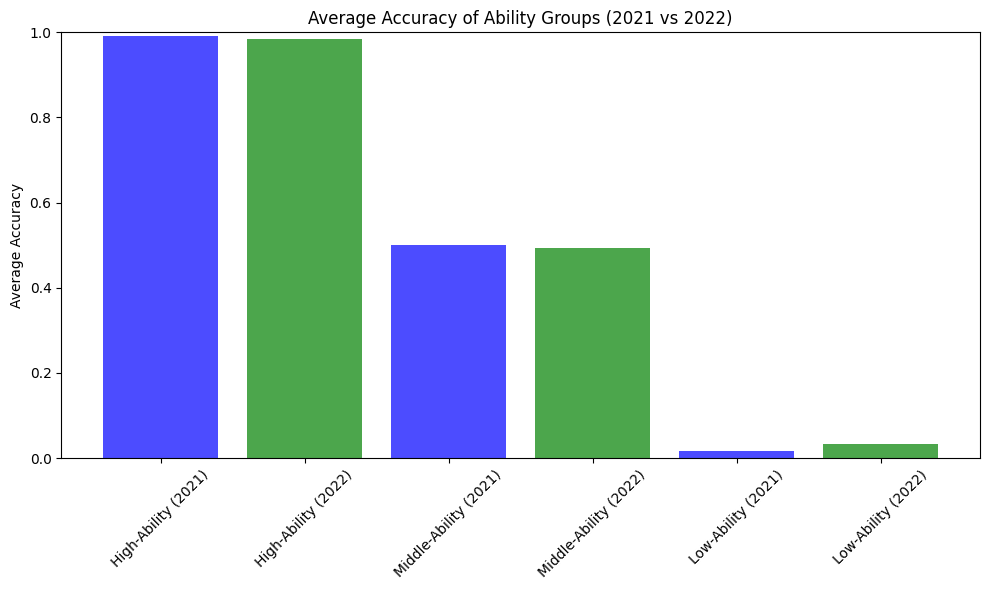

In [25]:

# Plot the average accuracy of each ability group for both years
labels = ['High-Ability (2021)', 'High-Ability (2022)', 'Middle-Ability (2021)', 'Middle-Ability (2022)', 'Low-Ability (2021)', 'Low-Ability (2022)']
accuracies = [avg_accuracy_high_2021, avg_accuracy_high_2022, avg_accuracy_middle_2021, avg_accuracy_middle_2022, avg_accuracy_low_2021, avg_accuracy_low_2022]

plt.figure(figsize=(10, 6))
bar_positions = np.arange(len(labels))
plt.bar(bar_positions, accuracies, color=['blue', 'green', 'blue', 'green', 'blue', 'green'], alpha=0.7)
plt.xticks(bar_positions, labels, rotation=45)
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of Ability Groups (2021 vs 2022)')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


In [26]:
question_features_2021

,question_id,avg_difficulty,freq_correct_answers,success_rate
0,1,-2.157522,832,0.832
1,2,-1.920777,803,0.803
2,3,-1.772619,782,0.782
3,4,-1.493058,748,0.748
4,5,-1.232536,713,0.713
5,6,-1.717551,775,0.775
6,7,-1.214318,711,0.711
7,8,-0.753790,633,0.633
8,9,-0.870725,658,0.658
9,10,-0.730441,627,0.627



Average Accuracies for Difficulty Groups:
{'High-Difficulty (2021)': np.float64(0.27625000000000005), 'High-Difficulty (2022)': np.float64(0.26076923076923075), 'Middle-Difficulty (2021)': np.float64(0.5023809523809524), 'Middle-Difficulty (2022)': np.float64(0.5273333333333333), 'Low-Difficulty (2021)': np.float64(0.7288333333333332), 'Low-Difficulty (2022)': np.float64(0.7716153846153847)}


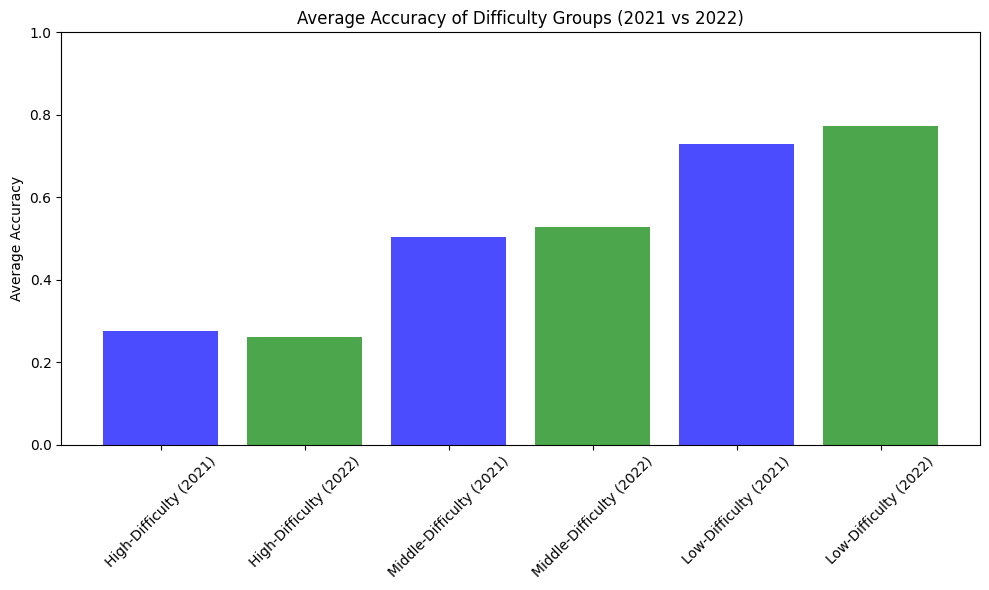

In [27]:
# Calculate difficulty thresholds for each year
difficulty_threshold_high_2021 = question_features_2021['avg_difficulty'].quantile(0.75)
difficulty_threshold_low_2021 = question_features_2021['avg_difficulty'].quantile(0.25)

difficulty_threshold_high_2022 = question_features_2022['avg_difficulty'].quantile(0.75)
difficulty_threshold_low_2022 = question_features_2022['avg_difficulty'].quantile(0.25)

# Create difficulty groups for each year
high_difficulty_questions_2021 = question_features_2021[question_features_2021['avg_difficulty'] >= difficulty_threshold_high_2021]
middle_difficulty_questions_2021 = question_features_2021[
    (question_features_2021['avg_difficulty'] > difficulty_threshold_low_2021) & 
    (question_features_2021['avg_difficulty'] < difficulty_threshold_high_2021)
]
low_difficulty_questions_2021 = question_features_2021[question_features_2021['avg_difficulty'] <= difficulty_threshold_low_2021]

high_difficulty_questions_2022 = question_features_2022[question_features_2022['avg_difficulty'] >= difficulty_threshold_high_2022]
middle_difficulty_questions_2022 = question_features_2022[
    (question_features_2022['avg_difficulty'] > difficulty_threshold_low_2022) & 
    (question_features_2022['avg_difficulty'] < difficulty_threshold_high_2022)
]
low_difficulty_questions_2022 = question_features_2022[question_features_2022['avg_difficulty'] <= difficulty_threshold_low_2022]

# Calculate average accuracy for each difficulty group for both years
avg_accuracy_high_2021 = high_difficulty_questions_2021['success_rate'].mean()
avg_accuracy_middle_2021 = middle_difficulty_questions_2021['success_rate'].mean()
avg_accuracy_low_2021 = low_difficulty_questions_2021['success_rate'].mean()

avg_accuracy_high_2022 = high_difficulty_questions_2022['success_rate'].mean()
avg_accuracy_middle_2022 = middle_difficulty_questions_2022['success_rate'].mean()
avg_accuracy_low_2022 = low_difficulty_questions_2022['success_rate'].mean()

# Prepare a summary of average accuracies for all difficulty groups
accuracy_summary = {
    "High-Difficulty (2021)": avg_accuracy_high_2021,
    "High-Difficulty (2022)": avg_accuracy_high_2022,
    "Middle-Difficulty (2021)": avg_accuracy_middle_2021,
    "Middle-Difficulty (2022)": avg_accuracy_middle_2022,
    "Low-Difficulty (2021)": avg_accuracy_low_2021,
    "Low-Difficulty (2022)": avg_accuracy_low_2022
}
print("\nAverage Accuracies for Difficulty Groups:")
print(accuracy_summary)

# Plot the average accuracy of each difficulty group for both years
labels = ['High-Difficulty (2021)', 'High-Difficulty (2022)', 'Middle-Difficulty (2021)', 'Middle-Difficulty (2022)', 'Low-Difficulty (2021)', 'Low-Difficulty (2022)']
accuracies = [avg_accuracy_high_2021, avg_accuracy_high_2022, avg_accuracy_middle_2021, avg_accuracy_middle_2022, avg_accuracy_low_2021, avg_accuracy_low_2022]

plt.figure(figsize=(10, 6))
bar_positions = np.arange(len(labels))
plt.bar(bar_positions, accuracies, color=['blue', 'green', 'blue', 'green', 'blue', 'green'], alpha=0.7)
plt.xticks(bar_positions, labels, rotation=45)
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of Difficulty Groups (2021 vs 2022)')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


In [28]:
# Lets check how the ability of student_features_2021 changed to 22 
# Calculate overall statistics for mean, median, and std in 2021 and 2022
mean_2021 = student_features_2021['avg_ability'].mean()
median_2021 = student_features_2021['avg_ability'].median()
std_2021 = student_features_2021['avg_ability'].std()

mean_2022 = student_features_2022['avg_ability'].mean()
median_2022 = student_features_2022['avg_ability'].median()
std_2022 = student_features_2022['avg_ability'].std()

# Perform a t-test to compare mean ability between 2021 and 2022
ability_ttest, ability_pvalue = ttest_ind(student_features_2021['avg_ability'], student_features_2022['avg_ability'], nan_policy='omit')

# Display results
print("2021 - Mean:", mean_2021, "Median:", median_2021, "Std:", std_2021)
print("2022 - Mean:", mean_2022, "Median:", median_2022, "Std:", std_2022)
print("T-test statistic:", ability_ttest, "P-value:", ability_pvalue)

# Interpretation:
if ability_pvalue < 0.05:
    print("The difference in student abilities between 2021 and 2022 is statistically significant.")
else:
    print("No significant difference in student abilities between 2021 and 2022.")

2021 - Mean: -0.04329516205217689 Median: -0.07519999636740285 Std: 2.166999165326068
2022 - Mean: 0.3310753708862932 Median: 0.102335377936949 Std: 2.4471138649833013
T-test statistic: -3.6218428568557406 P-value: 0.00029980667634614967
The difference in student abilities between 2021 and 2022 is statistically significant.


In [29]:
# Lets check how the difficulty of question_in_2021 changed to 22 
# Calculate overall statistics for mean, median, and std in 2021 and 2022
mean_2021 = question_features_2021['avg_difficulty'].mean()
median_2021 = question_features_2021['avg_difficulty'].median()
std_2021 = question_features_2021['avg_difficulty'].std()

mean_2022 = question_features_2022['avg_difficulty'].mean()
median_2022 = question_features_2022['avg_difficulty'].median()
std_2022 = question_features_2022['avg_difficulty'].std()




# Perform the Mann-Whitney U test to compare the distribution of mean abilities in 2021 and 2022
diff_mannwhitney, diff_pvalue_mannwhitney = mannwhitneyu(
    question_features_2021['avg_difficulty'], 
    question_features_2022['avg_difficulty'], 
    alternative='two-sided'
)

# Display results
print("Mann-Whitney U statistic:", diff_mannwhitney, "P-value:", diff_pvalue_mannwhitney)

# Interpretation:
if diff_pvalue_mannwhitney < 0.05:
    print("The difference in question difficulty between 2021 and 2022 is statistically significant (Mann-Whitney U Test).")
else:
    print("No significant difference in question difficulty between 2021 and 2022 (Mann-Whitney U Test).")


"""
# Perform a t-test to compare mean difficulty between 2021 and 2022
diff_ttest, diff_pvalue = ttest_ind(question_features_2021['avg_difficulty'], question_features_2022['avg_difficulty'], nan_policy='omit')

# Display results
print("2021 - Mean:", mean_2021, "Median:", median_2021, "Std:", std_2021)
print("2022 - Mean:", mean_2022, "Median:", median_2022, "Std:", std_2022)
print("T-test statistic:", diff_ttest, "P-value:", diff_pvalue)

# Interpretation:
if diff_pvalue < 0.05:
    print("The difference in question difficulty between 2021 and 2022 is statistically significant.")
else:
    print("No significant difference in question difficulty between 2021 and 2022.")"""

Mann-Whitney U statistic: 1039.0 P-value: 0.5239428839288407
No significant difference in question difficulty between 2021 and 2022 (Mann-Whitney U Test).


'\n# Perform a t-test to compare mean difficulty between 2021 and 2022\ndiff_ttest, diff_pvalue = ttest_ind(question_features_2021[\'avg_difficulty\'], question_features_2022[\'avg_difficulty\'], nan_policy=\'omit\')\n\n# Display results\nprint("2021 - Mean:", mean_2021, "Median:", median_2021, "Std:", std_2021)\nprint("2022 - Mean:", mean_2022, "Median:", median_2022, "Std:", std_2022)\nprint("T-test statistic:", diff_ttest, "P-value:", diff_pvalue)\n\n# Interpretation:\nif diff_pvalue < 0.05:\n    print("The difference in question difficulty between 2021 and 2022 is statistically significant.")\nelse:\n    print("No significant difference in question difficulty between 2021 and 2022.")'

In [30]:

# Add a 'year' column to each dataset to differentiate records by year after merging
data_2021['year'] = 2021
data_2022['year'] = 2022

# Concatenate both datasets
data_combined = pd.concat([data_2021, data_2022], ignore_index=True)

# Handle missing values if needed (e.g., drop rows with missing values in 'ability' or 'difficulty')
data_combined.dropna(subset=['ability', 'difficulty'], inplace=True)

# Convert 'answered_correctly' to integer (0 or 1) for modeling purposes
data_combined['answered_correctly'] = data_combined['answered_correctly'].astype(int)

# Display the first few rows of the combined dataset to confirm
print(data_combined.head())

# Now, data_combined is ready for further feature engineering and modeling

   student_id  question_id   ability  difficulty  answered_correctly  year
0         967           40 -0.320326    1.572793                   0  2021
1         135            2 -2.897524   -1.920777                   0  2021
2         553           18 -1.207800   -0.482901                   0  2021
3         564           29 -2.012802    0.360224                   0  2021
4         449           42  0.332158    1.211066                   0  2021


In [31]:
data_combined.describe()

,student_id,question_id,ability,difficulty,answered_correctly,year
count,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000
mean,1026.815789,24.315789,0.153742,0.034742,0.512505,2021.526316
std,576.753180,13.822452,2.325029,1.120782,0.499846,0.499310
min,1.000000,1.000000,-5.751698,-2.157522,0.000000,2021.000000
25%,528.000000,12.000000,-1.275194,-0.870725,0.000000,2021.000000
50%,1050.500000,24.000000,0.030999,-0.147794,1.000000,2022.000000
75%,1525.250000,36.000000,1.547547,1.069916,1.000000,2022.000000
max,2000.000000,50.000000,9.957734,2.194765,1.000000,2022.000000


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the features and target
X = data_combined[['ability', 'difficulty', 'year']]
y = data_combined['answered_correctly']

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Dictionary to hold cross-validation results
results = {}

# Evaluate each model using cross-validation
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    scores = {metric: cross_val_score(model, X, y, cv=5, scoring=scoring[metric]).mean() for metric in scoring}
    results[model_name] = scores

# Display the results
results_df = pd.DataFrame(results).T  # Transpose for readability
print(results_df)


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
                     accuracy  precision    recall        f1
Logistic Regression  0.999726   0.999466  1.000000  0.999733
Decision Tree        0.998832   0.998809  0.998870  0.998881
Random Forest        0.999063   0.999014  0.999096  0.999076
Gradient Boosting    0.995947   0.995609  0.996488  0.996047


In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Define features and target
X = data_combined[['ability', 'difficulty', 'year']]
y = data_combined['answered_correctly']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and parameter grids for GridSearchCV
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__max_iter': [100, 200, 500]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__max_depth': [5, 10, 15, None],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [5, 10, None],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__learning_rate': [0.01, 0.1, 0.5],
            'model__max_depth': [3, 5, 10]
        }
    }
}

# Define evaluation metric
scorer = make_scorer(f1_score)

# Find the best model using GridSearchCV
best_model = None
best_score = 0
best_params = {}

for model_name, mp in model_params.items():
    print(f"Evaluating {model_name}...")
    
    pipeline = Pipeline([('model', mp['model'])])
    
    grid = GridSearchCV(pipeline, mp['params'], cv=5, scoring=scorer, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_params = grid.best_params_

# Print the best model and parameters
print("Best Model:", best_model)
print("Best F1 Score on Training Data:", best_score)
print("Best Parameters:", best_params)

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

# Predicting on Custom Data
# Example: Replace these values with new data you want to predict on
custom_data = pd.DataFrame({
    'ability': [-1.2, 0.5, 2.3],      # Replace with actual values
    'difficulty': [0.8, -0.3, 1.5],   # Replace with actual values
    'year': [2021, 2022, 2022]        # Replace with actual values
})

# Make predictions
custom_predictions = best_model.predict(custom_data)
print("Predictions for Custom Data:", custom_predictions)


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Best Model: Pipeline(steps=[('model', LogisticRegression(C=10))])
Best F1 Score on Training Data: 0.9997939748118085
Best Parameters: {'model__C': 10, 'model__max_iter': 100}
Test Accuracy: 0.9997543859649123
Test Precision: 0.9995925850478713
Test Recall: 0.9999320744464067
Test F1 Score: 0.9997623009270263
Predictions for Custom Data: [0 1 1]


In [35]:
import joblib

# Save the best model to a file
joblib.dump(best_model, '../model/best_model.pkl')
print("Model saved as best_model.pkl")

Model saved as best_model.pkl
